In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
path_to_files_dict = {}
for file_name in os.listdir(os.getcwd()):
    if '.csv' in file_name:
        path_to_file = os.path.abspath(file_name)
        path_to_files_dict['{}'.format(file_name.rsplit('.')[0])] = path_to_file
path_to_files_dict

{'olist_customers_dataset': '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/first_project/olist_customers_dataset.csv',
 'olist_order_items_dataset': '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/first_project/olist_order_items_dataset.csv',
 'olist_orders_dataset': '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/first_project/olist_orders_dataset.csv'}

In [3]:
customers_df = pd.read_csv(path_to_files_dict['olist_customers_dataset'])
orders_df = pd.read_csv(path_to_files_dict['olist_orders_dataset'], parse_dates=[3, 4, 5, 6, 7])
order_items_df = pd.read_csv(path_to_files_dict['olist_order_items_dataset'], parse_dates=['shipping_limit_date'])

## Убедимся, что всё считалось правильно: посмотрим на столбцы, типы данных, размерность, наличие пропущенных значений.

##### customers_df

In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
customers_df.shape

(99441, 5)

In [7]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [9]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### oreders_df

In [10]:
orders_df.head() 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [11]:
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [12]:
orders_df.shape

(99441, 8)

In [13]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [15]:
orders_df.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence thi

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,fc8396075ce143601c2d9e44e8e7777d,a6aba9b57d75ef3dec99ea987448a574,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


##### order_items_df

In [16]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
order_items_df.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [18]:
order_items_df.shape

(112650, 7)

In [19]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [21]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


>## Задание 1.
>### Сколько пользователей, которые совершили покупку только один раз?

   Для ответа на поставленный в задании вопрос, необходимо выдвинуть __*критерий*__, описывающий пользователя, который совершил покупку  единожды.  

   В данном случае, характеристикой того, что пользователь соврешил покупку взят факт, что он __произвел оплату__.


   __За критерий__, описывающий, что пользователь __произвел оплату__ выбран параметр - `order_approved_at`(*'время подтверждения оплаты заказа'*), который гарантирует, что пользователем были оплачены деньги за заказ в определенное время.  

   Таким образом, __алгоритм по поиску количества пользователей__, совершивших покупку __только один раз__, разбивается на следующие этапы: 
  1. __Создаем новую таблицу__ - `sales_customers_df`, как результат `inner join` датафреймов - customers_df и orders_df по колонке `customer_id`. 
  2. С помощью метода `dropna()` __удаляем__ из полученного в п.1 датафрейма те __заказы, для которых отсутствует факт оплаты__, т.е. избавляемся от строк с *NaN* в колонке `order_approved_at`.
  3. __Производим группировку по уникальным пользователям__ `customer_unique_id` и агрегируемся по колонке `order_id` методом `count()`, тем самым определяем, сколько покупок соврешил каждый уникальный пользователь.
  4. Производим __фильтрацию и отбираем лишь тех пользователей, кто произвел 1 покупку__. Присваиваем полученное значение переменной `customers_purchased_once`.
   


##### Этап I. Создаем новую таблицу `sales_customers_df`

In [22]:
sales_customers_df = orders_df[['order_id', 'customer_id', 'order_approved_at']]
sales_customers_df = sales_customers_df.merge(customers_df[['customer_id', 'customer_unique_id']], how='inner', on='customer_id')

In [23]:
sales_customers_df.head()

,order_id,customer_id,order_approved_at,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6


##### Этап II. Избавляемся от строк с *NaN* в колонке `order_approved_at`.

In [24]:
sales_customers_df = sales_customers_df.dropna(subset=['order_approved_at'])
sales_customers_df.head()

,order_id,customer_id,order_approved_at,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6


In [25]:
sales_customers_df.nunique()

order_id              99281
customer_id           99281
order_approved_at     90733
customer_unique_id    95997
dtype: int64

##### Этап III. Определяем, сколько покупок соврешил каждый уникальный пользователь.

In [26]:
sales_customers_df = sales_customers_df.groupby('customer_unique_id', as_index=False) \
                                        .agg({'customer_id': 'count'}) \
                                        .sort_values('customer_id', ascending=False) \
                                        .rename(columns={'customer_id': 'purchases_num'})
sales_customers_df.head()

,customer_unique_id,purchases_num
52925,8d50f5eadf50201ccdcedfb9e2ac8455,17
23450,3e43e6105506432c953e165fb2acf44c,9
10344,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37764,6469f99c1f9dfae7733b25662e7f1782,7
76005,ca77025e7201e3b30c44b472ff346268,7


##### Этап IV. Отсеиваем тех пользователей, кто совершил более 1 покупки и вычисляем количество пользователей, совершивших покупку всего лишь 1 раз:

In [27]:
customers_purchased_once = sales_customers_df.query('purchases_num == 1').value_counts('purchases_num')
customers_purchased_once

purchases_num
1    93049
dtype: int64

>## Задание 2.
>### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

   Изначально была версия, что заказы `order_id`, отображенные в `olist_order_items_dataset.csv` (*order_items_df*), позволяют оценить месяц доставки заказа по колонке `shipping_limit_date`. Но, в результате проверки было выявлено, что количество уникальных id заказов (`order_id`) в датафрейме `order_items_df` меньше, чем в `orders_df` на __775__ штук, что __не позволяет__ провести корректную оценку доставок заказов.

 В альтернативной версии __за критерий__, описывающий, что заказ __не доставлился__ пользователю выбрано отсутствие данных в параметре - `order_delivered_customer_date`(*'время доставки заказа'*).  

   Таким образом, __алгоритм поиска среднего количества заказов в месяц__, которые __не были доставлены__, разбивается на следующие этапы: 
  1. __Определяем__, сколько в __среднем проходит времени__ с момента создания заказа до доставки до клиента. 
  2. __Формируем представление__ о времени, когда каждый недоставленный заказ __по идее должен был быть доставлен до клиента__ (прогнозируемое время доставки - `predictable_deliver_date`), как сумму `delayed_delievers_df.order_purchase_timestamp` + `mean_time`.
  3. __Создаем таблицу__ `undelivered_orders_df` и добавляем столбцы - статусы заказа, как идентификатор причины, по которой заказ не доставлен до клиента. Для каждого `order_id` __заполняем__ соответствующий статус __единицей__.
  4. __Создаем таблицу__ `sum_undelivered_orders_df`, которая показывает __разбивку недоставленных заказов по датам и соответствующим причинам__.
  5. __Создаем таблицу__ `mean_undelivered_orders_percentage_df`, в которой указано какой __средний процент недоставленных заказов__ приходится на определенную причину __в разбивке по месяцам__.
  6. __Определеяем среднее количество__ недоставленных заказов `undelivered_orders_mean` в месяц и их __детализацаию по причинам__.

In [28]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Проверка

##### Преобразуем таблицу order_items_df к уникальному виду и отобразим в таблице `unique_order_items_df`

In [29]:
unique_order_items_df = order_items_df[['order_id','shipping_limit_date']]

In [30]:
unique_order_items_df.shipping_limit_date = unique_order_items_df.shipping_limit_date.dt.strftime('%Y-%m')

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
unique_order_items_df.head()

,order_id,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09
1,00018f77f2f0320c557190d7a144bdd3,2017-05
2,000229ec398224ef6ca0657da4fc703e,2018-01
3,00024acbcdf0a6daa1e931b038114c75,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02


In [32]:
unique_order_items_df = order_items_df.groupby('order_id', as_index=False).agg({'shipping_limit_date': pd.unique})
# unique_order_items_df = order_items_df.groupby('shipping_limit_date', as_index=False).agg({'order_id': lambda x: list(x) if len(set(x)) == 1 else 0})

In [33]:
unique_order_items_df.head()

,order_id,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-19T09:45:35.000000000
1,00018f77f2f0320c557190d7a144bdd3,2017-05-03T11:05:13.000000000
2,000229ec398224ef6ca0657da4fc703e,2018-01-18T14:48:30.000000000
3,00024acbcdf0a6daa1e931b038114c75,2018-08-15T10:10:18.000000000
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-13T13:57:51.000000000


##### Создадим таблицу `test_check_df` в которую внесем все значения из `orders_df` и те уникальные значения из созданной 
##### `unique_order_items_df`, которые совпадают по `order_id`.

In [34]:
orders_df.shape

(99441, 8)

In [35]:
check_df = unique_order_items_df.copy()
check_df['test'] = 1
test_check_df = orders_df[['order_id', 'order_delivered_customer_date', 'order_status']] \
                .merge(check_df, how='left', on='order_id')
test_check_df

,order_id,order_delivered_customer_date,order_status,shipping_limit_date,test
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,delivered,2017-10-06T11:07:15.000000000,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,delivered,2018-07-30T03:24:27.000000000,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,delivered,2018-08-13T08:55:23.000000000,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,delivered,2017-11-23T19:45:59.000000000,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,delivered,2018-02-19T20:31:37.000000000,1.0
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-17 15:08:01,delivered,2017-03-15T09:54:05.000000000,1.0
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-28 17:37:56,delivered,2018-02-12T13:10:37.000000000,1.0
99438,83c1379a015df1e13d02aae0204711ab,2017-09-21 11:24:17,delivered,2017-09-05T15:04:16.000000000,1.0
99439,11c177c8e97725db2631073c19f07b62,2018-01-25 23:32:54,delivered,2018-01-12T21:36:21.000000000,1.0


##### Избавимся от тех значений, которые есть в `unique_order_items_df`, и тем самым получим разницу таблиц (`orders_df`) и 
##### (`unique_order_items_df`) в результирующей (`test_check_part_df`)

In [36]:
test_check_part_df = test_check_df[test_check_df.test.isnull()].drop('test',axis=1)
test_check_part_df

,order_id,order_delivered_customer_date,order_status,shipping_limit_date
266,8e24261a7e58791d10cb1bf9da94df5c,NaT,unavailable,NaN
586,c272bcd21c287498b4883c7512019702,NaT,unavailable,NaN
687,37553832a3a89c9b2db59701c357ca67,NaT,unavailable,NaN
737,d57e15fb07fd180f06ab3926b39edcd2,NaT,unavailable,NaN
1130,00b1cb0320190ca0daa2c88b35206009,NaT,canceled,NaN
...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,NaT,unavailable,NaN
99283,3a3cddda5a7c27851bd96c3313412840,NaT,canceled,NaN
99347,a89abace0dcc01eeb267a9660b5ac126,NaT,canceled,NaN
99348,a69ba794cc7deb415c3e15a0a3877e69,NaT,unavailable,NaN


In [37]:
test_check_part_df.order_status.value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

### АЛТЕРНАТИВНАЯ ВЕРСИЯ

##### Этап I: Определяем, сколько в среднем проходит времени с момента создания заказа до доставки до клиента

In [38]:
# Посчитаем среднее время доставки
witout_nan_order_df = orders_df.dropna(subset=['order_delivered_customer_date'])
witout_nan_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [39]:
# Столько в среднем проходит времени с момента создания заказа до доставки до клиента
mean_time = np.mean(witout_nan_order_df.order_delivered_customer_date - witout_nan_order_df.order_purchase_timestamp)
mean_time

Timedelta('12 days 13:24:31.879068369')

##### Этап II: Формируем представление о времени, когда каждый недоставленный заказ по идее должен был быть доставлен до клиента

In [40]:
# Создаем датафрейм недоставленных заказов
delayed_delievers_df = orders_df.query('order_delivered_customer_date == "NaN"')

In [41]:
# Создаем колонку с прогнозируемым временем доставки для каждого order_purchase_timestamp на основании полученного среднего времени:
delayed_delievers_df = delayed_delievers_df.assign(predictable_deliver_date = delayed_delievers_df.order_purchase_timestamp + mean_time)

In [42]:
delayed_delievers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,predictable_deliver_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-04-24 01:46:39.879068369
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-06-17 06:09:19.879068369
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08-16 07:09:13.879068369
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-09-16 03:46:34.879068369
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018-01-23 00:57:38.879068369


##### Этап III: Создаем таблицу `undelivered_orders_df` и добавляем столбцы - статусы заказа

In [43]:
undelivered_orders_df = delayed_delievers_df.copy().reset_index(drop=True)
undelivered_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,predictable_deliver_date
0,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-04-24 01:46:39.879068369
1,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-06-17 06:09:19.879068369
2,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08-16 07:09:13.879068369
3,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-09-16 03:46:34.879068369
4,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018-01-23 00:57:38.879068369


In [44]:
# Создаем столбцы - статусы заказов и заполняем их единицами в соответсвии с принадлежностью к order_id 
indexes = undelivered_orders_df.order_status.unique().tolist()
for index in indexes:
    undelivered_orders_df[index] = np.where(undelivered_orders_df['order_status'] == index, 1, 0) 

In [45]:
undelivered_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,predictable_deliver_date,invoiced,shipped,processing,unavailable,canceled,delivered,created,approved
0,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-04-24 01:46:39.879068369,1,0,0,0,0,0,0,0
1,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-06-17 06:09:19.879068369,0,1,0,0,0,0,0,0
2,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08-16 07:09:13.879068369,1,0,0,0,0,0,0,0
3,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-09-16 03:46:34.879068369,0,0,1,0,0,0,0,0
4,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018-01-23 00:57:38.879068369,0,1,0,0,0,0,0,0


##### Этап IV: Создаем таблицу `sum_undelivered_orders_df`, которая показывает разбивку недоставленных заказов по датам и соответствующим причинам

In [46]:
undelivered_orders_df.predictable_deliver_date = undelivered_orders_df.predictable_deliver_date.dt.strftime('%Y-%m')
sum_undelivered_orders_df = undelivered_orders_df.query("order_status != 'delivered'") \
                                                    .fillna(1) \
                                                    .groupby('predictable_deliver_date', as_index=False)\
                                                    .agg({'order_delivered_customer_date': 'sum', 
                                                          'invoiced': 'sum',
                                                          'shipped': 'sum',
                                                          'processing': 'sum',
                                                          'unavailable': 'sum',
                                                          'canceled': 'sum',
                                                          'delivered': 'sum',
                                                          'created': 'sum',
                                                          'approved': 'sum',
                                                         }) \
                                                    .rename(columns={'order_delivered_customer_date': 'undelivered_orders'})

In [47]:
sum_undelivered_orders_df.head()

,predictable_deliver_date,undelivered_orders,invoiced,shipped,processing,unavailable,canceled,delivered,created,approved
0,2016-09,3,0,1,0,0,2,0,0,0
1,2016-10,53,18,8,2,7,18,0,0,0
2,2016-11,1,0,0,0,0,1,0,0,0
3,2017-01,13,3,5,3,0,2,0,0,0
4,2017-02,118,18,25,21,43,10,0,0,1


##### Этап V: Создаем таблицу`mean_undelivered_orders_percentage_df`, в которой указано какой средний процент недоставленных 

##### заказов приходится на определенную причину в разбивке по месяцам.

In [48]:
# Cреднее количество недоставленных заказов по месяцам
sum_undelivered_orders_df.predictable_deliver_date = pd.to_datetime(sum_undelivered_orders_df.predictable_deliver_date).dt.month_name()
mean_undelivered_orders_df = sum_undelivered_orders_df.groupby('predictable_deliver_date', as_index=False)\
                                                        .agg({'undelivered_orders': 'mean', 
                                                              'invoiced': 'mean',
                                                              'shipped': 'mean',
                                                              'processing': 'mean',
                                                              'unavailable': 'mean',
                                                              'canceled': 'mean',
                                                              'delivered': 'mean',
                                                              'created': 'mean',
                                                              'approved': 'mean',
                                                             }) \
                                                        .rename(columns={'undelivered_orders': 'undelivered_orders_mean'})

In [49]:
# Определение доли недоставленных заказов в процентах по каждой из причин.
mean_undelivered_orders_percentage_df = mean_undelivered_orders_df.copy()
for index in indexes:
    mean_undelivered_orders_percentage_df[index] = mean_undelivered_orders_percentage_df[index].apply(lambda x: round(x / mean_undelivered_orders_percentage_df.undelivered_orders_mean * 100, 2))


In [50]:
mean_undelivered_orders_percentage_df

,predictable_deliver_date,undelivered_orders_mean,invoiced,shipped,processing,unavailable,canceled,delivered,created,approved
0,April,133.000000,9.40,59.02,7.52,8.65,15.41,0.0,0.00,0.00
1,August,167.500000,16.17,39.85,8.65,19.55,41.73,0.0,0.00,0.00
2,December,251.000000,22.56,69.92,23.31,57.14,13.53,0.0,2.26,0.00
3,February,147.500000,9.77,27.07,12.03,28.57,32.71,0.0,0.38,0.38
4,January,86.000000,6.02,23.68,16.54,15.79,2.63,0.0,0.00,0.00
5,July,121.000000,4.14,42.86,1.88,22.18,19.92,0.0,0.00,0.00
6,June,93.000000,6.39,29.70,7.52,12.03,14.29,0.0,0.00,0.00
7,March,171.500000,7.52,58.27,15.41,21.43,26.32,0.0,0.00,0.00
8,May,148.500000,17.67,52.26,9.02,14.29,18.05,0.0,0.00,0.38
9,November,95.500000,8.65,16.17,6.39,25.19,15.04,0.0,0.38,0.00


##### Этап VI: Определеяем среднее количество недоставленных заказов `undelivered_orders_mean` в месяц и их детализацаию по причинам

In [51]:
mean_undelivered_orders_df.groupby('delivered') \
                            .agg({'undelivered_orders_mean': 'mean', 
                                  'invoiced': 'mean',
                                  'shipped': 'mean',
                                  'processing': 'mean',
                                  'unavailable': 'mean',
                                  'canceled': 'mean',
                                  'created': 'mean',
                                  'approved': 'mean'   
                                }) \
                            .reset_index(drop=True)

,undelivered_orders_mean,invoiced,shipped,processing,unavailable,canceled,created,approved
0,128.402778,13.555556,48.805556,13.222222,27.333333,25.069444,0.333333,0.083333


In [52]:
mean_undelivered_orders_df.describe()

,undelivered_orders_mean,invoiced,shipped,processing,unavailable,canceled,delivered,created,approved
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000
mean,128.402778,13.555556,48.805556,13.222222,27.333333,25.069444,0.0,0.333333,0.083333
std,54.019705,7.519111,26.703463,8.021856,17.660090,13.772953,0.0,0.861640,0.194625
min,53.333333,5.500000,14.000000,2.500000,8.000000,3.500000,0.0,0.000000,0.000000
25%,91.250000,8.375000,29.000000,9.625000,18.250000,18.750000,0.0,0.000000,0.000000
50%,127.000000,11.750000,46.250000,11.083333,23.500000,20.250000,0.0,0.000000,0.000000
75%,153.250000,15.125000,71.500000,17.125000,30.500000,28.625000,0.0,0.125000,0.000000
max,251.000000,30.000000,93.000000,31.000000,76.000000,55.500000,0.0,3.000000,0.500000


>## Задание 3.
>### По каждому товару определить, в какой день недели товар чаще всего покупается?

   __Алгоритм определения дня недели__, в который совершается __наибольшее количество покупок__, разбивается на следующие этапы: 
  1. Создаем таблицу `orders_freq_df` путем объединения таблиц `orders_df` и `order_items_df` по ключу `order_id`.
  2. Переводим данные колонки `order_purchase_timestamp` к формату дня недели.
  3. Получаем таблицу товаров `order_most_freq_weekday_df` с указанием дней недели, в которые они приобретаются чаще всего.


##### Этап I: Создаем таблицу `orders_freq_df` путем объединения таблиц `orders_df` и `order_items_df` по ключу `order_id`

In [53]:
orders_freq_df = orders_df[['order_purchase_timestamp', 'order_id']] \
                .merge(order_items_df[['order_id', 'product_id']], how='inner', on='order_id')
orders_freq_df

,order_purchase_timestamp,order_id,product_id
0,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a
1,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8
2,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415
3,2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0
4,2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e
...,...,...,...
112645,2018-02-06 12:58:58,63943bddc261676b46f01ca7ac2f7bd8,f1d4ce8c6dd66c47bbaa8c6781c2a923
112646,2017-08-27 14:46:43,83c1379a015df1e13d02aae0204711ab,b80910977a37536adeddd63663f916ad
112647,2018-01-08 21:28:27,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4
112648,2018-01-08 21:28:27,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4


##### Этап II: Переводим данные колонки `order_purchase_timestamp` к формату дня недели

In [54]:
orders_freq_df.order_purchase_timestamp = orders_freq_df.order_purchase_timestamp.dt.day_name()
orders_freq_df

,order_purchase_timestamp,order_id,product_id
0,Monday,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a
1,Tuesday,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8
2,Wednesday,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415
3,Saturday,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0
4,Tuesday,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e
...,...,...,...
112645,Tuesday,63943bddc261676b46f01ca7ac2f7bd8,f1d4ce8c6dd66c47bbaa8c6781c2a923
112646,Sunday,83c1379a015df1e13d02aae0204711ab,b80910977a37536adeddd63663f916ad
112647,Monday,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4
112648,Monday,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4


##### Этап III:Создаем таблицу `order_most_freq_weekday_df`, в которой представлены дни недели, в которые наиболее часто приобретаются определенные товары с указанием частоты покупки в этот день `Counts`.

In [55]:
# Вариант реализации 1
order_most_freq_weekday_df = orders_freq_df.groupby('product_id')['order_purchase_timestamp'] \
                                            .value_counts() \
                                            .reset_index(level=['product_id', 'order_purchase_timestamp'], name='Counts') \
                                            .groupby('product_id', as_index=False) \
                                            .head(1) \
                                            .rename(columns={'order_purchase_timestamp': 'order_purchase_weekday'})
order_most_freq_weekday_df

,product_id,order_purchase_weekday,Counts
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
...,...,...,...
61221,fff6177642830a9a94a0f2cba5e476d1,Saturday,1
61223,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
61224,fff9553ac224cec9d15d49f5a263411f,Friday,1
61225,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


In [56]:
# Вариант реализации 2
orders_freq_df.groupby(['product_id', 'order_purchase_timestamp'], as_index=False) \
                .agg({'order_id': 'count'}) \
                .sort_values(['product_id', 'order_id'], ascending=False) \
                .groupby('product_id') \
                .head(1) \
                .rename(columns={'order_purchase_timestamp': 'order_purchase_weekday', 'order_id': 'Count'})

,product_id,order_purchase_weekday,Count
61229,fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday,1
61228,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2
61224,fff9553ac224cec9d15d49f5a263411f,Friday,1
61223,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
61221,fff6177642830a9a94a0f2cba5e476d1,Saturday,1
...,...,...,...
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1


>## Задание 4.
>### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

   __Алгоритм определения среднего количества покупок в неделю__ по месяцам, которое было совершено пользователем, разбивается на следующие этапы: 
  1. __Создаем таблицу__ `customers_purchases_test` путем объединения таблиц `orders_df` и `customers_df` по ключу `customer_id`. Тем самым добиваемся наличие параметров `customer_unique_id` и `order_approved_at` в одной таблице.
  2. __Производим группировку__ по `customer_unique_id, order_approved_at` и рассчитываем количество совершенных покупок за месяц для каждой пары пользователь/дата.
  3. Рассчитываем __среднее количество покупок в неделю__ у каждого пользователя в месяц.


##### Этап I: Получаем таблицу `customers_purchases_test` с параметрами `customer_unique_id` и `order_approved_at`

In [57]:
customers_purchases_test = orders_df[['order_id', 'customer_id', 'order_approved_at']] \
                            .merge(customers_df[['customer_id', 'customer_unique_id']], how='inner', on='customer_id')

In [58]:
customers_purchases_test.head()

,order_id,customer_id,order_approved_at,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6


##### Этап II: Производим группировку по `customer_unique_id, order_approved_at` и рассчитываем количество совершенных покупок за месяц для каждой пары пользователь/ дата

In [59]:
# Приводим order_approved_at к виду год-месяц
customers_purchases_test.order_approved_at = customers_purchases_test.order_approved_at.dt.strftime('%Y-%m')
customers_purchases_test.head()

,order_id,customer_id,order_approved_at,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02,72632f0f9dd73dfee390c9b22eb56dd6


In [60]:
customers_purchases_test = customers_purchases_test.dropna() \
                                                    .groupby(['customer_unique_id', 'order_approved_at']) \
                                                    .order_id \
                                                    .count() \
                                                    .reset_index(level=['customer_unique_id', 'order_approved_at'], name='Counts')

In [61]:
customers_purchases_test

,customer_unique_id,order_approved_at,Counts
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
97907,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
97908,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
97909,ffff371b4d645b6ecea244b27531430a,2017-02,1
97910,ffff5962728ec6157033ef9805bacc48,2018-05,1


##### Этап III: Рассчитываем среднее количество покупок в неделю у каждого пользователя в месяц

In [62]:
# Получаем количество недель в месяце
customers_purchases_test['weeks_per_month'] = (pd.to_datetime(customers_purchases_test.order_approved_at).dt.daysinmonth) / 7

In [63]:
customers_purchases_test

,customer_unique_id,order_approved_at,Counts,weeks_per_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714
...,...,...,...,...
97907,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,4.285714
97908,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,4.428571
97909,ffff371b4d645b6ecea244b27531430a,2017-02,1,4.000000
97910,ffff5962728ec6157033ef9805bacc48,2018-05,1,4.428571


In [64]:
# Создаем колонку и расчитываем среднее количество покупок в неделю для каждого клиента
customers_purchases_test['avg_orders_per_week'] = customers_purchases_test.Counts / customers_purchases_test.weeks_per_month 

In [65]:
customers_purchases_test.sort_values('avg_orders_per_week', ascending=False)

,customer_unique_id,order_approved_at,Counts,weeks_per_month,avg_orders_per_week
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,4.428571,1.354839
23910,3e43e6105506432c953e165fb2acf44c,2018-02,4,4.000000,1.000000
69301,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4,4.000000,1.000000
62114,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4,4.000000,1.000000
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4,4.285714,0.933333
...,...,...,...,...,...
40853,6a88124470b2dfdcd14d76a86778eb1a,2017-05,1,4.428571,0.225806
40855,6a8a24e593bae849d77f65cae0afd180,2018-08,1,4.428571,0.225806
40856,6a8b7d9797f91b35bd7c2400e3e3fa30,2018-05,1,4.428571,0.225806
40857,6a8ba6d38bf76b702054d6fadc3664ba,2018-08,1,4.428571,0.225806


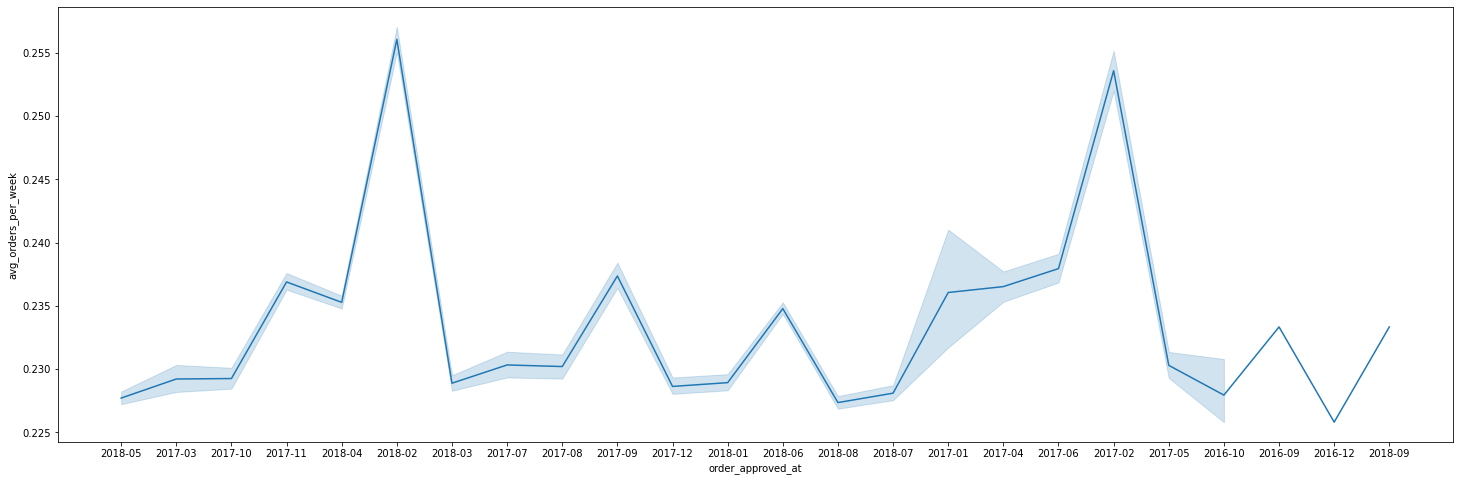

In [66]:
plt.figure(figsize = (25,8))
sns.lineplot(data=customers_purchases_test, x='order_approved_at', y='avg_orders_per_week')

>## Задание 5.
>### Проведем когортный анализ пользователей. В период с января по декабрь выявим когорту с самым высоким retention на 3й месяц.

__Retention__ - показатель, который __характеризует 'возвращаемость' клиента__. В нашем случае, показателем 'возвращаемости' является __повторная покупка клиентом__.

Расчет retention получили, как: 

    количество клиентов (из когорты) совершивших покупки в текущем месяце / общее количество клиентов в первый месяц своей покупки (количество клиентов к когорте)
    
   __Алгоритм определения retention__ в составе когортного анализа, разбивается на следующие этапы: 
   
  1. __Формируем исходную таблицу__ для анализа, как результат объединения таблиц `orders_df` и `customers_df` по ключу `customer_id`.
  2. __Производим очистку__ данных.
  3. Приводим __дату__ `order_approved_at` __к началу месяца__ (`purchase_month`).
  4. __Создаем когорты__, как самые первые записи о покупках клиентов.
  5. Создаем таблицу `cohort_df` с __подсчетом количества пользователей совершивших покупки__ в каждый период в каждой когорте.
  6. Определяем __количество месяцев__ с начала анализа когорт, __как периоды (`periods`)__.
  7. __Определяем изначальное количество клиентов, совершивших покупки в когорте__, как наибольшее значение `purchases_count` в когорте.
  8. __Расчитываем `retention`__, как отношение клиентов, сделавших покупку в период к общему числу клиентов в когорте.
  9. __Строим сводную таблицу `cohort_pivot`__, в которой в качестве значений указаны величины __в процентах__.
  10. Выявим __наибольший `retention` в 3-ий месяц__ когортного анализа.
  11. Создадим __визуализацию__ с помощью `heatmap`.


##### Этап I: Формируем исходную таблицу для анализа, как результат объединения таблиц `orders_df` и `customers_df`
##### по ключу `customer_id`

In [67]:
analysis_df = orders_df[['customer_id', 'order_approved_at', 'order_status']].merge(customers_df[['customer_id', 'customer_unique_id']], how='left', on='customer_id')

In [68]:
analysis_df.head()

,customer_id,order_approved_at,order_status,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,delivered,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,delivered,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,delivered,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,delivered,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,delivered,72632f0f9dd73dfee390c9b22eb56dd6


##### Этап II: Производим очистку данных

In [69]:
# Удаляем значения Nan
analysis_df = analysis_df.dropna()

In [70]:
analysis_df.isna().sum()

customer_id           0
order_approved_at     0
order_status          0
customer_unique_id    0
dtype: int64

In [71]:
analysis_df.shape

(99281, 4)

In [72]:
# Убираем строки, в которых order_status из ('invoiced', 'unavailable', 'canceled')
# analysis_df = analysis_df[~analysis_df.isin({'order_status': ['invoiced', 'unavailable', 'canceled']})]
analysis_df = analysis_df[~analysis_df.order_status.isin(['invoiced', 'unavailable', 'canceled'])]

In [73]:
analysis_df.head()

,customer_id,order_approved_at,order_status,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,delivered,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,delivered,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,delivered,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,delivered,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,delivered,72632f0f9dd73dfee390c9b22eb56dd6


In [74]:
analysis_df.shape

(97874, 4)

##### Этап III: Приводим дату `order_approved_at` к началу месяца (`purchase_month`)

In [75]:
analysis_df['purchase_month'] = analysis_df.order_approved_at.astype('datetime64[M]')

##### Этап IV: Создаем когорты, как самые первые записи о покупках клиентов

In [76]:
analysis_df['cohort'] = analysis_df.groupby('customer_unique_id')['purchase_month'] \
                                .transform('min')

In [77]:
analysis_df.head()

,customer_id,order_approved_at,order_status,customer_unique_id,purchase_month,cohort
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,delivered,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,2017-09-01
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,delivered,af07308b275d755c9edb36a90c618231,2018-07-01,2018-07-01
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,delivered,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01,2018-08-01
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,delivered,7c142cf63193a1473d2e66489a9ae977,2017-11-01,2017-11-01
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,delivered,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-01,2018-02-01


##### Этап V: Создаем таблицу `cohort_df` с подсчетом количества пользователей совершивших покупки в каждый период в каждой когорте

In [78]:
cohort_df = analysis_df.groupby(['cohort', 'purchase_month']) \
                        .agg(purchases_count = ('customer_unique_id', 'nunique')) \
                        .reset_index()

##### Этап VI: Определяем количество месяцев с начала анализа когорт, как периоды (`periods`)

In [79]:
cohort_df['periods'] = ((cohort_df.purchase_month - cohort_df.cohort)/np.timedelta64(1, 'M')).round().astype('int')

##### Этап VII: Определяем изначальное количество клиентов, совершивших покупки в когорте, как наибольшее значение `purchases_count` в когорте

In [80]:
cohort_df['cohort_start_purchases'] = cohort_df.groupby('cohort')['purchases_count'].transform('max')

##### Этап VIII: Расчитываем `retention`, как отношение клиентов, сделавших покупку в период к общему числу клиентов в когорте

In [81]:
cohort_df['retention'] = cohort_df.purchases_count / cohort_df.cohort_start_purchases * 100

##### Этап IX: Строим сводную таблицу `cohort_pivot`, в которой в качестве значений указаны величины в процентах

In [82]:
# Преобразуем тип даты в индексе к строчному
cohort_df.cohort = cohort_df.cohort.dt.strftime('%Y-%m')

In [83]:
cohort_pivot = cohort_df.pivot(index='cohort', columns='periods', values='retention')

In [84]:
cohort_pivot

periods,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,100.0,NaN,NaN,NaN,NaN,NaN,0.366300,NaN,NaN,0.366300,NaN,0.366300,NaN,0.366300,NaN,0.366300,NaN,0.366300,0.732601,0.732601
2016-12,100.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,0.567376,0.283688,0.141844,0.425532,0.141844,0.425532,0.141844,0.141844,NaN,0.283688,0.283688,0.709220,0.425532,0.141844,0.141844,0.283688,0.425532,0.141844,NaN
2017-02,100.0,0.240674,0.240674,0.180505,0.421179,0.120337,0.240674,0.180505,0.060168,0.180505,0.120337,0.300842,0.120337,0.180505,0.120337,0.060168,0.060168,0.240674,NaN,NaN
2017-03,100.0,0.504463,0.349243,0.349243,0.349243,0.155219,0.155219,0.310438,0.310438,0.116414,0.349243,0.116414,0.232829,0.116414,0.155219,0.232829,0.077610,0.155219,NaN,NaN
2017-04,100.0,0.612156,0.218627,0.174902,0.262352,0.262352,0.349803,0.262352,0.349803,0.174902,0.218627,0.087451,0.043725,0.043725,0.087451,0.087451,0.131176,NaN,NaN,NaN
2017-05,100.0,0.538701,0.481996,0.396938,0.311880,0.340232,0.425291,0.141764,0.255174,0.255174,0.283527,0.340232,0.198469,0.056705,0.198469,0.226822,NaN,NaN,NaN,NaN
2017-06,100.0,0.451322,0.354610,0.386847,0.257898,0.322373,0.354610,0.225661,0.128949,0.225661,0.322373,0.354610,0.161186,0.128949,0.193424,NaN,NaN,NaN,NaN,NaN


##### Этап X: Выявим наибольший `retention` в 3-ий месяц когортного анализа

In [85]:
cohort_df.query('periods == 2').sort_values('retention', ascending=False).head(1).iloc[:, [0, 5]]

,cohort,retention
143,2017-09,0.489956


##### Этап XI: Создадим визуализацию с помощью heatmap

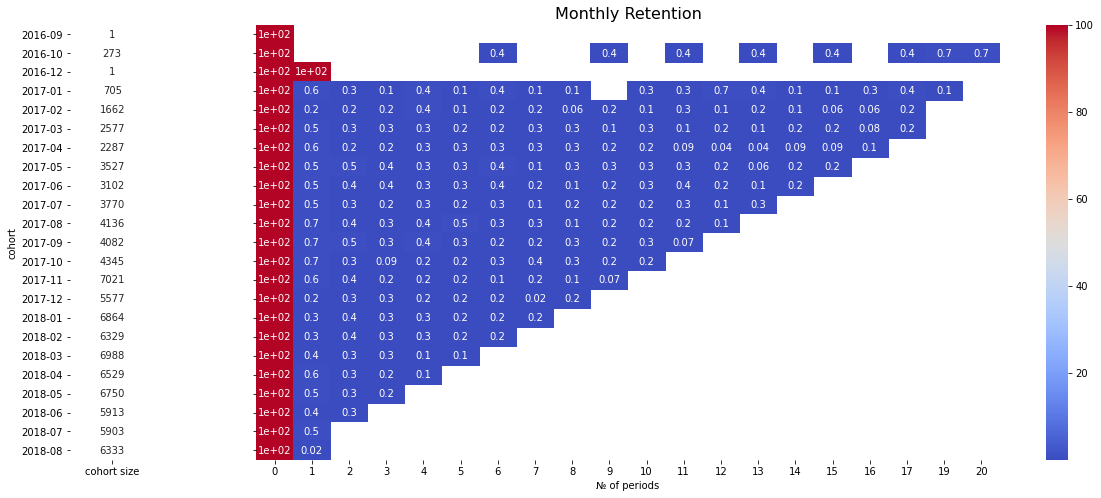

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True,\
                       gridspec_kw={'width_ratios': [1, 11]})

sns.heatmap(cohort_pivot,
            mask=cohort_pivot.isnull(),
            annot=True,
            fmt='.1g',
            cmap='coolwarm',
            ax=ax[1]
           )

ax[1].set_title('Monthly Retention', fontsize=16)
ax[1].set(xlabel='№ of periods', ylabel='')

cohort_size_df = pd.DataFrame(cohort_df.groupby('cohort').purchases_count.max()).rename(columns={'purchases_count': 'cohort size'})
white_cmap = mcolors.ListedColormap(['white'])

sns.heatmap(cohort_size_df,
            annot=True,
            cbar=False,
            fmt='g',
            cmap=white_cmap,
            ax=ax[0])



>## Задание 6.
>### Построим RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

Для построение RFM-сегментации был определен период анализа в 2 года. В качестве показателей были взяты:
- R (recency) - время, прошедшее с момента последней покупки клиентом до текущей даты;
- F (frequency) - суммарное количество покупок пользователем за все время (частота покупок);
- M (monetary) - сумма покупок пользователя за все анализируемое время.

    
   __Алгоритм проведения RFM-сегментации__  разбивается на следующие этапы: 
   
  1. __Предобработка данных__ для анализа:
      -  Получим таблицу `merged_orders_price` для анализа в результате __объединения таблиц__ `orders_df`, `customers_df`, `order_items_df`.
      - __Очистим__ ее от пропущенных значений и заказов со статусами `'invoiced'`, `'unavailable'`, `'canceled'`.
      
      
  2. __Производим cоставление сегментации__ клиентов:
      - __Объявим дату `'NOW'`__, которую считаем текущей для расчета `recency`, как __последнюю дату заказа + 1 день__
      - __Посчитаем количество дней с покупки__ до текущей даты `'days_since_order'`.
      - __Посчитаем__ показатели `'monetary'`, `'frequency'` и `'recency'` за последние __два года__.
      - Для предварительной оценки сегментов __посмотрим на r, f, m - квартили с шагом 20%__ и на __распределение количества пользователей по количеству совершенных покупок__.
      - __Создадим таблицу__ с категориями __сегментаций__ пользователей.
      
__На основании полученных квартилей и распределений__ клиентов по количеству сделаных покупок за определнный период видим, что:
 - Как минимум __95% клиентов совершили максимум 1 покупку за 2 года__. Соответсвенно __сегментировать по квартилям показатель `frequency` не представляется целесообразным__. Поэтому, для __f_categorical__ осуществим сегментацию на __5 ступеней__ в соответсвии с распределением (__категория '1'__: 1-2 заказа (разовые), __категория '2'__: 3-4 заказа (редкие), __категория '3'__: 5-6 заказов (частые), __категория '4'__: 7-9 заказа (множественные, частые), __категория '5'__: >9 заказов (выбросы/ аномалии, крайне много заказов).
 - __75% последних покупок приходится на текущий год__ (`NOW`). Поэтому, для __r_categorical__ __сегментируем по пяти 20%-ым квартилям__.
 - У __суммарных затрат__ тоже присутствует выброс в 13440, а __на промежутке до 80%-го квартиля значения распределены более-менее равномерно__, поэтому в случае с __m_categorical__ осуществим __сегментацию по пяти 20%-ым квартилям__. 

### Этап I: Предобработка данных

##### Выполним мердж для получения customer_unique_id и order_id в одной таблице

In [95]:
merged_orders = orders_df[['order_id', 'customer_id', 'order_status', 'order_approved_at']].merge(customers_df[['customer_unique_id', 'customer_id']], how='inner', on='customer_id')
merged_orders.head()

,order_id,customer_id,order_status,order_approved_at,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6


In [204]:
merged_orders.shape

(99441, 5)

##### Создадим промежуточную таблицу с колонкой - суммарными тратами по каждому заказу

In [97]:
intermediate_df = order_items_df.groupby('order_id', as_index=False).agg({'price': 'sum'}).rename(columns={'price': 'total_price'})

##### Мерджимся и оcтавляем только те заказы, которые были в order_items_df, у которых есть цена

In [98]:
merged_orders_price = merged_orders.merge(intermediate_df, how='inner', on='order_id') \
                                    .rename(columns={'order_approved_at': 'order_date'})

In [99]:
merged_orders_price = merged_orders_price.dropna(subset=['order_date'])


##### Оставляем только те заказы, по которым точно получена оплата - т.е. есть факт покупки

In [100]:
merged_orders_price = merged_orders_price[~merged_orders_price.order_status.isin(['invoiced', 'unavailable', 'canceled'])]

In [101]:
merged_orders_price.head()

,order_id,customer_id,order_status,order_date,customer_unique_id,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,19.90


### Этап II: Составление сегментации

In [102]:
print('Orders from {} to {}'.format(merged_orders_price['order_date'].min(),
                                    merged_orders_price['order_date'].max()))


Orders from 2016-09-15 12:16:38 to 2018-09-03 17:40:06


##### Объявим дату, которую считаем текущей для расчета recency, как последнюю дату заказа + 1 день

In [103]:
NOW = merged_orders_price['order_date'].max() + pd.Timedelta(days=1)

In [104]:
NOW

Timestamp('2018-09-04 17:40:06')

##### Посчитаем количество дней с покупки до текущей даты

In [105]:
merged_orders_price['days_since_order'] = merged_orders_price.order_date.apply(lambda x: (NOW - x).days)

In [106]:
merged_orders_price.head()

,order_id,customer_id,order_status,order_date,customer_unique_id,total_price,days_since_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff,29.99,337
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,118.70,40
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,159.90,27
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,45.00,289
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,19.90,202


##### Посчитаем monetary, frequency и recency за последние два года

In [147]:
frm_df = merged_orders_price[merged_orders_price.order_date >= NOW - pd.Timedelta(days=730)] \
                            .groupby('customer_unique_id', as_index=False) \
                            .agg({'days_since_order': 'min', 'order_id': 'count', 'total_price': 'sum'}) \
                            .rename(columns={'days_since_order': 'recency', 'order_id': 'frequency', 'total_price': 'monetary'})
frm_df.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


##### Проведем сегментацию пользователей

In [203]:
# Рассчитаем квантили (20%, 40%, 60%, 80%, 95%, 100%)
quintiles = frm_df[['recency', 'frequency', 'monetary']].quantile(q=[.2, .4, .6, .8, 0.95, 1])
quintiles


,recency,frequency,monetary
0.20,98.0,1.0,39.90
0.40,182.0,1.0,69.90
0.60,273.0,1.0,109.90
0.80,388.0,1.0,179.90
0.95,525.0,1.0,419.98
1.00,719.0,16.0,13440.00


In [152]:
# Посмотрим распределение количества пользователей по количеству совершенных покупок
frm_df.frequency.value_counts()

1     91803
2      2636
3       187
4        29
5         9
6         5
7         3
16        1
9         1
Name: frequency, dtype: int64

In [165]:
frm_df.describe()

,recency,frequency,monetary
count,94674.000000,94674.000000,94674.000000
mean,243.288918,1.033790,141.867925
std,152.800159,0.210699,215.722446
min,1.000000,1.000000,0.850000
25%,119.000000,1.000000,47.800000
50%,224.000000,1.000000,89.800000
75%,352.000000,1.000000,154.910000
max,719.000000,16.000000,13440.000000


##### Создадим таблицу с категориями сегментаций пользователей

In [192]:
frm_categorical_df = frm_df.copy()

In [193]:
frm_categorical_df['r_categorical'] = pd.qcut(frm_df.recency,
                                   q=[0, .2, .4, .6, .8, 1],
                                   labels=['5', '4', '3', '2', '1']
                                  ).astype(int)

In [199]:
frm_categorical_df['f_categorical'] = pd.cut(frm_df.frequency,
                                   bins=[0, 2, 4, 6, 9, 100],
                                   labels=['1', '2', '3', '4', '5']
                                  ).astype(int)

In [200]:
frm_categorical_df['m_categorical'] = pd.qcut(frm_df.monetary,
                                   q=5,
                                   labels=['1', '2', '3', '4', '5']
                                  ).astype(int)

In [201]:
frm_categorical_df

,customer_unique_id,recency,frequency,monetary,r_categorical,f_categorical,m_categorical
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5
...,...,...,...,...,...,...,...
94669,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,5
94670,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,3,1,2
94671,ffff371b4d645b6ecea244b27531430a,574,1,89.90,1,1,3
94672,ffff5962728ec6157033ef9805bacc48,125,1,115.00,4,1,4
